# Project: Investigate a Dataset - Investigation on Movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset investigated on this proyect contains information about 10,865 movies collected from [The Movie Database (TMDb)](https://www.themoviedb.org/), including user ratings and revenue. These are films released from 1960 to 2015.

The dataset includes 21 columns: 
- **id**
- **imdb_id**
- **popularity**: we can think of it "as being a 'lifetime' popularity score" impacted by different attributes. Find more info [here](https://developer.themoviedb.org/docs/popularity-and-trending)
- **budget**: budget of the film.
- **revenue**: total revenues.
- **original_title**: flim original title.
- **cast**: names of the first actors and actresses appearing in the film credits.
- **homepage**: some films have a webpage.
- **director**: names of directors.
- **tagline**: film tagline (if there is).
- **keywords**: keywords associated to the film.
- **overview**: very short summary of the film narrative.
- **runtime**: runtime in minues.
- **genres**: genres in which the film is categorizated.
- **production_companies**: names of the film production companies.
- **release_date**: release date.
- **vote_count**: number of votes got in TMDb.
- **vote_average**: average score in TMDb.
- **release_year**: film's year of release.
- **budget_adj**: film's budget in terms of 2010 dollars, accounting for inflation over time.
- **revenue_adj**: film's revenue in terms of 2010 dollars, accounting for inflation over time.



### Questions for Analysis

In this proyect we will aproach the following questions about our dataset:
- Which genres are most popular from year to year? 
- Do genres with higher popularity get higher revenues?
- Do popularity or revenues of the genre promote more films of those genres to be released?
- What kind of properties are associated with movies that have high revenues?

In [5]:
# We import the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [6]:
# We load our data and have an overview of our dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [7]:
# We check the size of our dataframe
df.shape

(10866, 21)

In [8]:
# We have a look at all column names,data types and missing data
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# We search for duplicated rows
df.duplicated().sum()

1

In [10]:
# We confirm that the row is duplicated
df[df.duplicated()].id

2090    42194
Name: id, dtype: int64

In [11]:
df.query('id == 42194  ')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
# We have an overview of the unique values in every column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [13]:
df.release_year.sort_values(ascending=True)

10172    1960
10141    1960
10142    1960
10143    1960
10144    1960
         ... 
417      2015
416      2015
415      2015
422      2015
0        2015
Name: release_year, Length: 10866, dtype: int64


### Data Cleaning


In this dataset we have found:
- One duplicated row
- Columns irrelevant for our questions, such as: imdb_id, budget, revenue (we will keep only de adjusted budget and revenue), homepage, tagline, director, production_companies, homepage, release_date and overview.
- Missing values
- Columns with values separated by "|"

The following steps will be aimed to solve these issues.

In [14]:
# We drop irrelevant columns and duplicated rows
df.drop(columns=['id', 'imdb_id', 'budget', 'revenue', 'cast', 'keywords', 'tagline', 
                 'director', 'production_companies', 'homepage', 'release_date', 'overview'], inplace=True)
df.drop_duplicates(inplace= True)

# Check the result
df.head(1)

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


In [15]:
# We check for missing values after the first cleaning
df.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [16]:
# We drop rows with missing values and check the result
df.dropna(inplace=True)
df.isnull().sum()


popularity        0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

So far, we have drop irrelevant columns, duplicated rows and rows with missing values.
The size of our dataset is now:

In [17]:
df.shape

(10842, 9)

Further on this investigation we will need to group our data by genres. 
So we split the values separated by '|' in 'genres'.

In [18]:
# We inspect the values on the column 'genres', to confirm that the data are genres separated by '|'
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [19]:
# We separate the values in different rows
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
df = df.explode(column='genres')
df.head() 

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08


In [20]:
df.genres.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

As there are not many different genres, we can optimize our data type

In [21]:
# We change the data type from string to category according to the new changes
df['genres'] = df.genres.astype('category')
df.dtypes

popularity         float64
original_title      object
runtime              int64
genres            category
vote_count           int64
vote_average       float64
release_year         int64
budget_adj         float64
revenue_adj        float64
dtype: object

In [22]:
df.shape

(26955, 9)

Now we have a clean dataset with 9 columns and 26955 rows and we are ready for the EDA

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

In [23]:
# We create a dataframe with the most popular genre in every year
pop_gen = []
for year in range(1960, 2016):
    df_year = df.query('release_year == @year')
    df_yr_mean = df_year.groupby('genres').mean(numeric_only=True)
    pop_gen_yr = df_yr_mean.query('popularity == @df_yr_mean.popularity.max()').index[0]
    pop_gen.append(pop_gen_yr)
df_pop_gen = pd.DataFrame({'year': range(1960, 2016), 'pop_gen':pop_gen})
df_pop_gen

,year,pop_gen
0,1960,Thriller
1,1961,Animation
2,1962,Adventure
3,1963,Animation
4,1964,War
5,1965,Music
6,1966,Animation
7,1967,Animation
8,1968,Mystery
9,1969,Crime


Through the years there had been different genres winning in popularity. It is interesting to notice that at the begining of this century we observe quite long periods of trends for the genres "fantasy" and "adventure". Such long trends periods are not observed in 20th century.

We will visualize the most popular genres across the years using a pie chart.

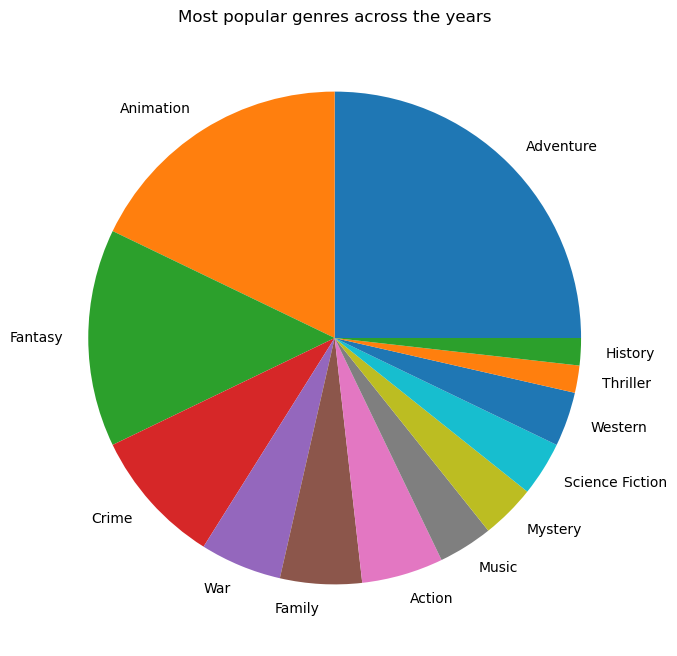

In [24]:
df_pop_gen['pop_gen'].value_counts().plot(kind='pie', 
                                          figsize=(8,8),
                                         title='Most popular genres across the years',
                                         ylabel='');

This is the "genre of the year" ranking.
Adventure, animation and fantasy have been the most popular genre of the year in more than half of the years explored.

This is what we find when we compare only the "winnig genre" for every year. But, let's have a look at the total mean popularity by genre.

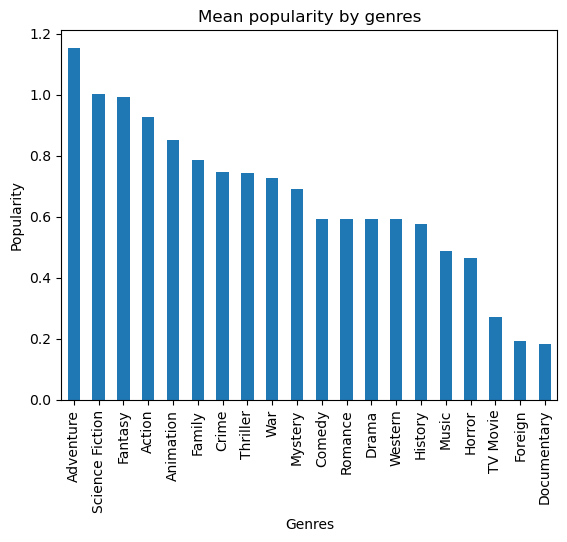

In [25]:
ind = df.groupby('genres').mean(numeric_only=True).popularity.sort_values(ascending=False).index
df.groupby('genres').mean(numeric_only=True).popularity[ind].plot(kind='bar',
                                           x='genres',
                                           title='Mean popularity by genres',
                                           xlabel='Genres',
                                           ylabel='Popularity');

Adventure stands as the most popular genre.

But Science fiction, which was quite low in the "genre of the year" ranking, is the second most popular genre while observing the total picture!

It is also surprising that animation is on the 5th position for most popular genres, but it was on the second position in the "genre of the year" category.

#### Which is the most popular film of our interval of time?

In [26]:
max_pop = df.popularity.max()
df.query('popularity == @max_pop')

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124,Adventure,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124,Science Fiction,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,124,Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


It is interesting that this high popularity score is not associated with a high vote average.

With such a high popularity compared to the mean, it is probably an outlier.
We will create a box plot to see it more clear.

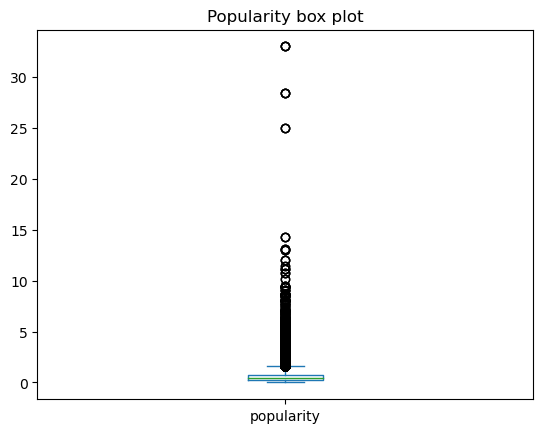

In [27]:
df.popularity.plot(kind='box', title='Popularity box plot');

We see a big amount of outliers and this film is very far from the general behaviour. This film is taged in the genres of adventure, science fiction, thriller and action. It is probably afecting strongly our previous results in such genres.

### Do genres with higher popularity get higher revenues?
### Do popularity or revenues of the genre promote more films of those genres to be released?

In this section we compare popularity, revenue and number of films released for every genre. 

We could think at first that popular genres get more revenues and therefore production companies release more films of those genres.

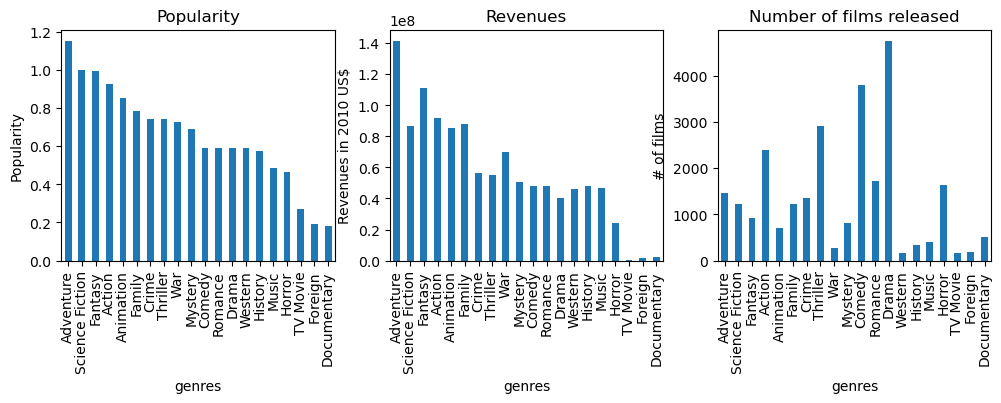

In [28]:
df_genres = df.groupby('genres').mean(numeric_only=True)
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True)

df_genres['popularity'][ind].plot(kind='bar', figsize=(12,3), ax=axes[0], title='Popularity', ylabel='Popularity');                           
df_genres['revenue_adj'][ind].plot(kind='bar', figsize=(12,3), ax=axes[1], title='Revenues', ylabel='Revenues in 2010 US$');
df.genres.value_counts()[ind].plot(kind='bar', figsize=(12,3), ax=axes[2], title='Number of films released', ylabel='# of films');

We observe approximately the same tendency in popularity and revenues, but surprisingly the number of films released of every genre do not follow this behaviour.

We can explore a possible correlation between popularity and revenues with a scatterplot.

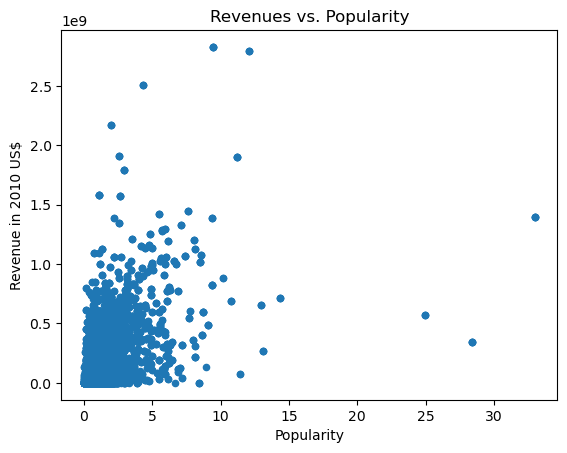

In [29]:
# Drawing a scatterplot
df.plot.scatter(x='popularity', y='revenue_adj',
               title='Revenues vs. Popularity',
               xlabel='Popularity',
               ylabel='Revenue in 2010 US$');

Due to the big amount of outliers we can not see clear enough the possible correlation between both parameters. 

### What kind of properties are associated with movies that have high revenues?

At this point we need to remember that we duplicated the info about films in order to take into account the different genres for every single movie. To analyse the revenues we need first to drop all duplicated rows for each film.

In [30]:
df.duplicated('original_title').sum()

16407

In [31]:
# We drop the column for 'genres' and leave only one row for each film
df_films = df.drop(columns='genres')
df_films.drop_duplicates(inplace=True)
df_films.shape

(10842, 8)

Now we can calculate the statistic descriptive parameters for revenues

In [32]:
df_films.revenue_adj.describe()

count    1.084200e+04
mean     5.147797e+07
std      1.447723e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.387838e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

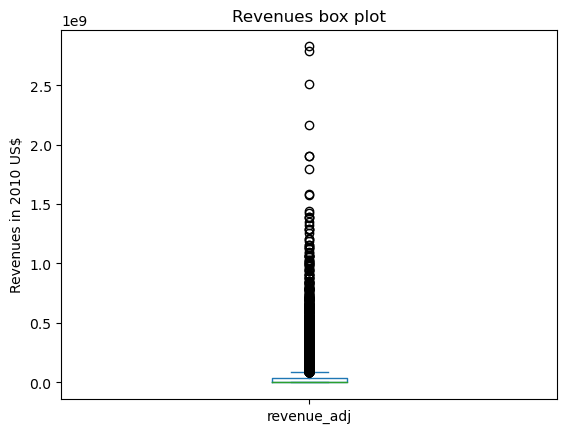

In [33]:
df_films.revenue_adj.plot(kind='box', title='Revenues box plot', ylabel='Revenues in 2010 US$' );

We find again a big amount of outliers that should be removed for a good analysis

#### Which is the film with the highest revenue?

In [34]:
df_films.query('revenue_adj > 2.827e+09 ')

,popularity,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,162,8458,7.1,2009,2.408869e+08,2.827124e+09


Avatar (2009) stands as the film with the highest revenue in the period from 1960 to 2015

#### We will analice the properties of films with revenue higher than a percentil of 75%

In [35]:
# We select the data with revenues higher than 3.388e+07 2010 US$ and calculate the main descriptive statistic parameters
df_hi_rev = df_films[df_films['revenue_adj'] >= 3.388e+07]
df_hi_rev.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2711.000000,2711.000000,2711.000000,2711.000000,2711.000000,2.711000e+03,2.711000e+03
mean,1.433033,112.104758,686.111767,6.268683,1999.282553,5.283185e+07,1.972997e+08
std,1.665714,23.257806,996.645328,0.750304,12.264423,4.884501e+07,2.352155e+08
min,0.010335,26.000000,10.000000,3.400000,1960.000000,0.000000e+00,3.388022e+07
25%,0.595216,97.000000,127.000000,5.800000,1992.000000,1.821054e+07,6.419977e+07
50%,1.013101,109.000000,315.000000,6.300000,2002.000000,3.841392e+07,1.127104e+08
75%,1.668893,123.000000,795.000000,6.800000,2009.000000,7.503895e+07,2.303185e+08
max,32.985763,705.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


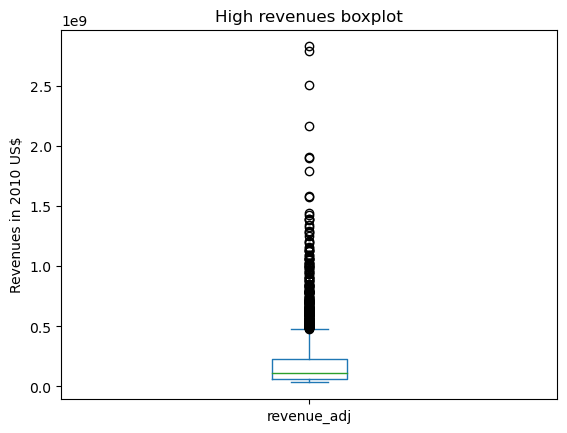

In [36]:
# Drawing a boxplot
df_hi_rev.revenue_adj.plot(kind='box', title='High revenues boxplot', ylabel='Revenues in 2010 US$');

We observe many outliers. Before analysing the different properties we will have to clean our data from outliers. After that, for each propertie, we will calculate the main descriptive statistic parameters and visualice the data distribution histogram.
As we will do the same for each parameter, we will use a function to save code.

In [37]:
def stats_hist(datf, column:'str'):
    ''' 
    This function calculates the main descriptive statistic parameters of a column in a dataframe
    and plots a histogram.
    '''
    assert column in datf, 'inserted column is not in Dataframe'
    print(datf[column].describe())
    return datf[column].plot(kind='hist', title=f'High revenue films {column} histogram');

#### Runtime

We will analyse the runtime carateristics for films with high revenues

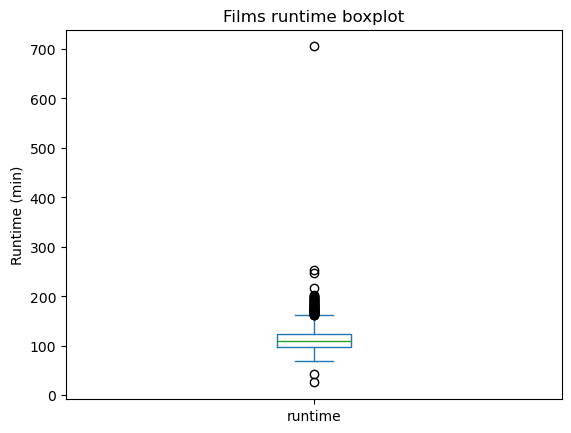

In [38]:
# Drawing a boxplot
df_hi_rev.runtime.plot(kind='box', title='Films runtime boxplot', ylabel='Runtime (min)');

Once again there are many outliers.

We still have not learned effective ways of deleting these many outliers, but we will delete some.

In [39]:
# Looking for information to drop outliers
df_hi_rev.runtime.sort_values()

8005      26
9137      44
9462      69
10168     72
4966      72
        ... 
8282     202
9850     216
10443    248
10304    254
2722     705
Name: runtime, Length: 2711, dtype: int64

In [40]:
# Droping outliers
ind_min = df_hi_rev.query('runtime <= 44').index
ind_max = df_hi_rev[df_hi_rev['runtime'] >= 158].index
df_hi_rev_runt = df_hi_rev.drop(index=ind_min)
df_hi_rev_runt.drop(index=ind_max, inplace=True)

We check that there are no more outliers

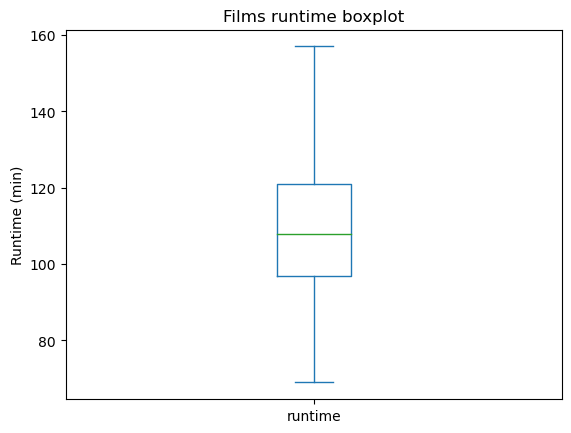

In [41]:
# Drawing a boxplot
df_hi_rev_runt.runtime.plot(kind='box', title='Films runtime boxplot', ylabel='Runtime (min)');

Much better now!

Now we can calculate the descriptive statistic parameters for higher revenue films and plot a histogram

count    2626.000000
mean      109.923839
std        16.601627
min        69.000000
25%        97.000000
50%       108.000000
75%       121.000000
max       157.000000
Name: runtime, dtype: float64


<Axes: title={'center': 'High revenue films runtime histogram'}, ylabel='Frequency'>

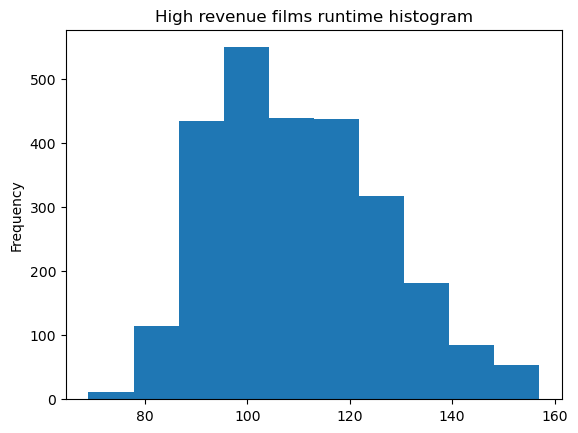

In [42]:
# We use the function we created before
stats_hist(df_hi_rev_runt, 'runtime')

The runtime of high revenue films are within a range from 69 to 157 minutes with a mean runtime of 110 minutes. The data distribution has a tail towards right.

#### Budget

We analize the budget of higher revenue films.

We draw a boxplot to visualize the outliers.

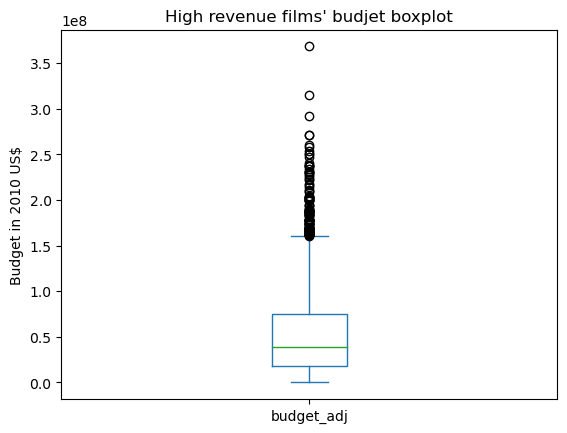

In [43]:
df_hi_rev['budget_adj'].plot(kind='box', title="High revenue films' budjet boxplot", ylabel='Budget in 2010 US$');

We remove the outliers and plot the result.

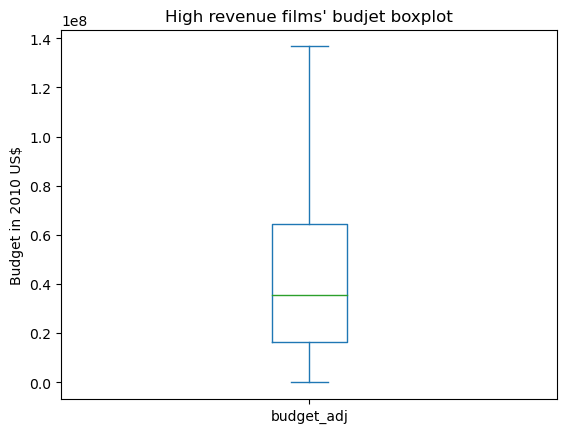

In [44]:
ind_max_bud = df_hi_rev.query('budget_adj > 1.37e+08').index
df_hi_rev_bud = df_hi_rev.drop(index=ind_max_bud)
df_hi_rev_bud.budget_adj.plot(kind='box', title="High revenue films' budjet boxplot", ylabel='Budget in 2010 US$');

We calculate the main descriptive statistic parameters and plot a histogram to see the distribution.

count    2.508000e+03
mean     4.287578e+07
std      3.390198e+07
min      0.000000e+00
25%      1.625306e+07
50%      3.556058e+07
75%      6.447637e+07
max      1.367169e+08
Name: budget_adj, dtype: float64


<Axes: title={'center': 'High revenue films budget_adj histogram'}, ylabel='Frequency'>

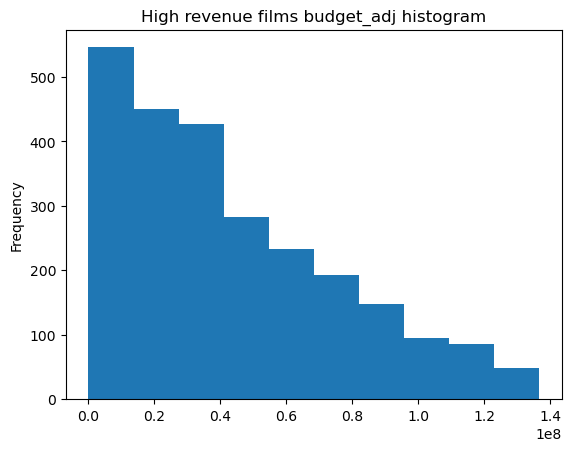

In [45]:
stats_hist(df_hi_rev_bud, 'budget_adj')

Many high revenues films did not have a big budget. There are even films with budget equal cero!

#### Vote average

We analize the vote average of these films. We search for outliers and remove them

<Axes: title={'center': "High revenue films' vote average"}>

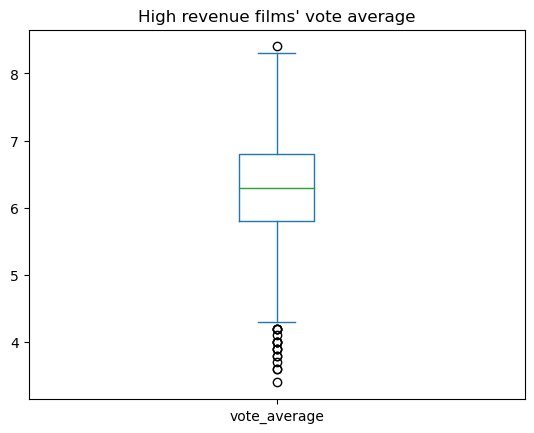

In [46]:
df_hi_rev.vote_average.plot(kind='box', title="High revenue films' vote average")

In [47]:
# Search for outliers
df_hi_rev.vote_average.sort_values().head(10)

7526    3.4
7969    3.6
7378    3.6
9603    3.7
7971    3.8
2611    3.8
102     3.9
5334    3.9
6668    3.9
8866    4.0
Name: vote_average, dtype: float64

In [48]:
df_hi_rev.vote_average.max()

8.4

In [49]:
# Remove outliers
ind_max = df_hi_rev.query('vote_average == 8.4').index
ind_min = df_hi_rev.query('vote_average <= 3.9').index
df_hi_rev_vot = df_hi_rev.drop(index=ind_max)
df_hi_rev_vot.drop(index=ind_min, inplace=True)

count    2701.000000
mean        6.276342
std         0.736060
min         4.000000
25%         5.800000
50%         6.300000
75%         6.800000
max         8.300000
Name: vote_average, dtype: float64


<Axes: title={'center': 'High revenue films vote_average histogram'}, ylabel='Frequency'>

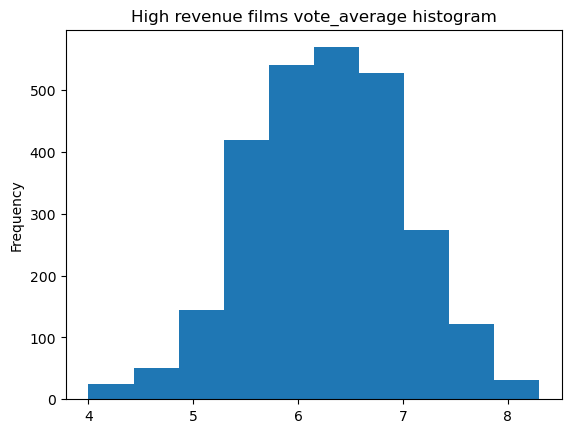

In [50]:
# We use the function we created before to calculate main statistic parameters and histogram
stats_hist(df_hi_rev_vot, 'vote_average')

The data seem to follow a normal distribution.

The mean vote average is 6.2 and the maximum value is 8.3. As these are data of high revenue films they do not seem to be very high scores. We will compare them with the total dataset. 

In [51]:
# We compare the results with the total dataset
df.vote_average.describe()

count    26955.000000
mean         5.956535
std          0.911927
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

We see that the mean vote average of high revenue films (score of 6.2) is just slightly higher than the mean vote average of the total amount of films (score of 5.9)

### Correlation relations

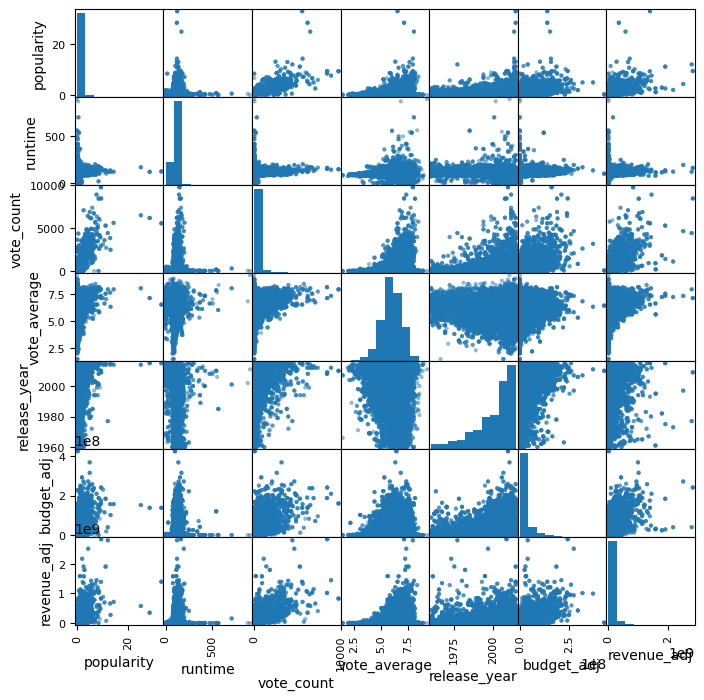

In [52]:
# We plot the scatter matrix for the whole dataset
pd.plotting.scatter_matrix(df, figsize=(8,8));

As we can see, the large amount of outliers make no possible for us to analyse correlation relations. We can intuitively 

<a id='conclusions'></a>
## Conclusions

In this proyect we have got a list of the most popular film genre for every year from 1960 to 2015. We have cleaned our data dropping irrelevant columns, duplicated rows and missing data. We have also splitted "|" - separated values before starting our analysis.

We started analysing film popularity by genres. We have observed quite long trends of the genres fantasy and adventure in the last fifteen year. Long trends which are not observed before 2001. The genres adventure, animation and fantasy are the top three "genres of the year", but we also checked that science fiction was the second more popular genre after adventure if we take into account the total popularity average of the genre. The most popular film of all dataset is "Jurassic World" with a 33 popularity score.

We have seen that genres follow a relatively similar tendency in popularity and revenue. But surprisingly, it seems to be no correlation between these parameters and the number of films released for the genres. 


Finally we have analysed the properties of films with higher revenue. We have selected the films in a percentil 75% of higher revenue and investigated the characteristics of runtime, budget and vote average. For each of these parameters we have visualised their boxplots and removed the outliers.
The mean runtime of high revenue films is 110 minutes, the maximum value is 157 minutes and the minimum 69 minutes.
The mean budget of high revenue films is 42.9 million 2010 USD. The maximum budget is 136.7 million 2010 USD and the minimum 0 USD. The budget distribution histogram shows a bigger density in lower budgets with a median of 35.6 million 2010 USD. Many high revenue films did not have a big budget.
The mean vote average of high revenue films is 6.2, wich does not differ much from the 5.9 vote average of the total dataset. They follow a normal gaussian-distribution.

Avatar (2009) stands as the film with the highest revenue of all dataset.

#### Limitations and further investigation

The bigger limitation that I have found on this investigation has been the large amount of outliers, which I still do not know how to remove effectively. So the results that we get in this investigation might be strongly marked by these outliers. 
These many outliers has also prevented this proyect from investigating correlation relations between the different parameters.  It would be necessary to explore in a further investigation the possible correlation between popularity and revenues found when analysing the genres.

It would be also interesting to analyse the relation between popularity and vote average, as counterintuitively we had some clues pointing no positive correlation between them.

While analyzing higher revenue films, as we where working with a smaller dataset, it was possible to remove the outliers and get fairer statistic parameters. But these values isolated are not so significant if we can not compare them with those from the total dataset. If we where able to remove the outliers from the total dataset we could have calculated good statistic parameters to be compared with those of high revenue films.


## Submitting the Project 

In [53]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset-TMDb.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset-TMDb.ipynb to html
[NbConvertApp] Writing 1418875 bytes to Investigate_a_Dataset-TMDb.html
